In [1]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/mouginot/work/helpmetric"))
import cymetrichelper as cyh
import pandahelper as pdh


import cymetric as cym
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
from cymetric import graphs as cgr
from cymetric import timeseries as tm

%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


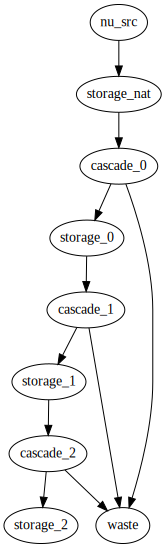

In [2]:
flow = cyh.MakeFlowGraph("case_2_/cascade_case_2_no_rec_raw_S2.sqlite", label='')
flow.body.pop(0)
flow

In [3]:
import re

flow.body
for i in range(len(flow.body)):
    flow.body[i] = re.sub('(storage_2)', 'storage_HEU', flow.body[i])
    #flow.body[i] = re.sub('(storage)', 'str', flow.body[i])
    #flow.body[i] = re.sub('(cascade)', 'cscd', flow.body[i])

flow.view(filename='flow_case_2_recy')

'flow_case_2_recy.pdf'

In [2]:
file = "case_3_/cascade_case_3_raw_S4.sqlite"
sender = [['cascade_0'], 
             ['cascade_1'], 
             ['cascade_2'], 
             ['cascade_3'], 
             ['cascade_4'], 
             ['cascade_5']]
receivers = [['storage_0'], 
          ['storage_1'], 
          ['storage_2'], 
          ['storage_3'], 
          ['storage_4'],
            ['storage_5']]
nucs1 = ['238U']
nucs2 = ['235U']
uma_238u = 238050786.996e-6
uma_235u = 235043928.190e-6

c_names = ['Level 0',
           'Level 1',
           'Level 2',
           'Level 3',
           'Level 4',
           'Level 5']
labels = ['Cascade0',
          'Cascade0rec',
          'Cascade1',
          'Cascade2',
          'Cascade3',
          'Cascade4',
          'Cascade5']

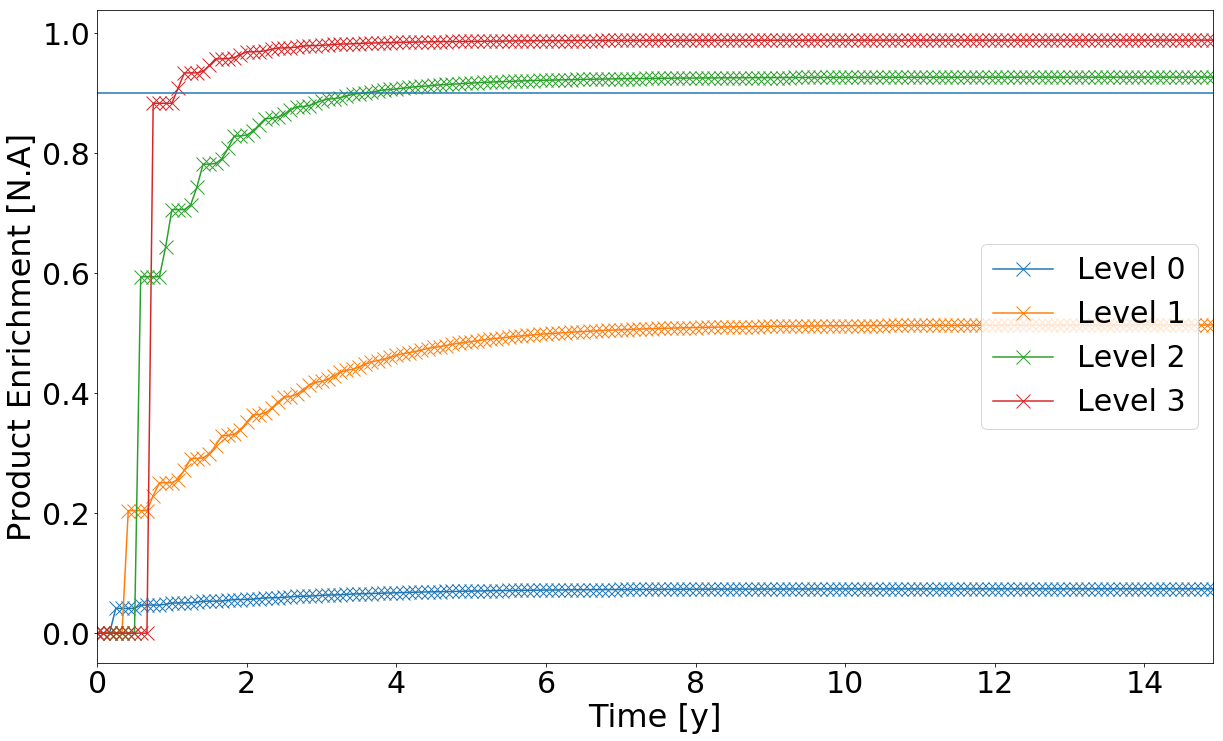

In [3]:
file = "case_3_/cascade_case_3_raw_S3.sqlite"


feed_case_2 = [] 
plt_feed_case_2 = []
for i in range(4):
    df_ = cyh.TransFrac(file, receivers[i], sender[i], nucs1, nucs2,uma_238u, uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time [y]", c_names[i])
    df_['Time [y]'] *= 1/12.
    feed_case_2.append(df_)
    plt_feed_case_2.append( (df_, c_names[i]) )
    
pdh.MakePlot(plt_feed_case_2, "Time [y]", "Product Enrichment [N.A]" , loc='center right')
plt.axhline(y=0.9)
plt.savefig("assay_case_2_rec.png")

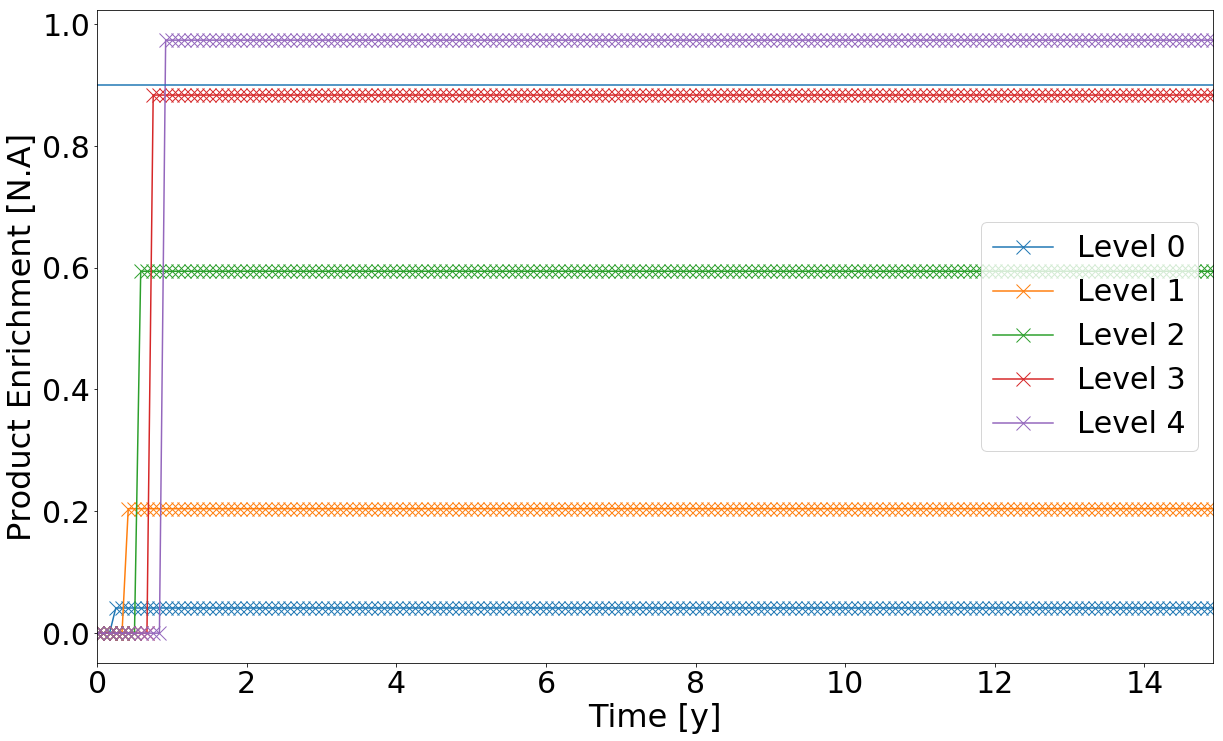

In [4]:
file = "case_3_/cascade_case_3_no_rec_raw_S4.sqlite"


feed_case_2 = [] 
plt_feed_case_2 = []
for i in range(5):
    df_ = cyh.TransFrac(file, receivers[i], sender[i], nucs1, nucs2,uma_238u, uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time [y]", c_names[i])
    df_['Time [y]'] *= 1/12.
    feed_case_2.append(df_)
    plt_feed_case_2.append( (df_, c_names[i]) )
    
pdh.MakePlot(plt_feed_case_2, "Time [y]", "Product Enrichment [N.A]" , loc='center right')
plt.axhline(y=0.9)
plt.savefig("assay_case_2_no_rec.png")

In [ ]:
files = ['cascade_case_2_no_rec_24_4_1_1.sqlite',
         'cascade_case_1.sqlite']
invs = ['storage_3',
        
        'storage']

c_names = ['24/4/1/1','REF']

LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []

for i in range(2):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)

    df_ = tm.inventories(ev_, [invs[i]])
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_['Time'] *= 1/12.
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    
pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "LEU Amount" )
plt.axhline(y=25)

x = np.arange(0, 16, 1);
#plt.plot(x, x*4.818481656138361*1*12, linewidth=4);

#plt.plot(x, x*4.306458967931736*1*12, linewidth=4);

#plt.plot(x, x*4.818481656138361*2*12, linewidth=4);
#plt.plot(x, x*4.818481656138361*3*12, linewidth=4);
#plt.plot(x, x*4.818481656138361*4*12, linewidth=4);
#plt.plot(x, x*4.818481656138361*5*12, linewidth=4);





